<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
# digits.sample(5)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

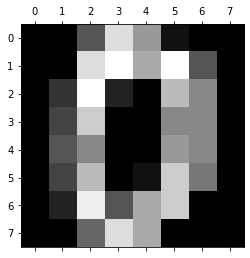

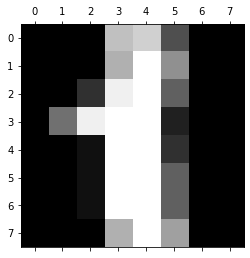

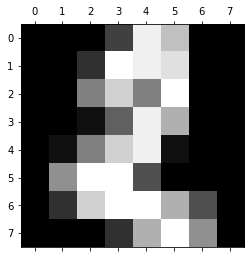

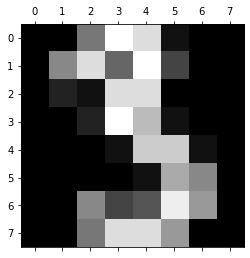

In [4]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target

In [9]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1628,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,1.0,0.0,0.0,0.0,4
1531,0.0,2.0,15.0,13.0,2.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,2.0,15.0,13.0,6.0,4.0,1.0,0.0,2
1149,0.0,0.0,15.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,4.0,5.0,13.0,6.0,0.0,8
356,0.0,0.0,2.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,5.0,0.0,0.0,0.0,4
211,0.0,0.0,8.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0,7


**Train and the model and prediction**

In [10]:
X = df.drop('target',axis='columns')
y = df.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
model.score(X_test, y_test)

0.9722222222222222

In [25]:
y_predicted = model.predict(X_test)

**classification report**

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        34
           3       0.97      0.87      0.92        39
           4       1.00      1.00      1.00        42
           5       0.94      0.94      0.94        36
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        34
           8       0.91      1.00      0.95        30
           9       1.00      0.96      0.98        28

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



**Confusion Matrix**

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 34,  0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 34,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 27]], dtype=int64)

Text(69.0, 0.5, 'Truth')

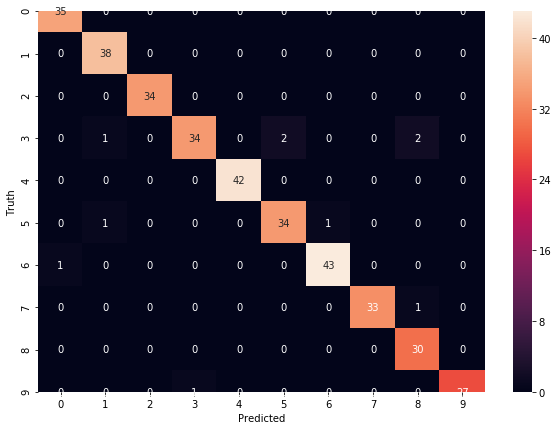

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees